<a href="https://colab.research.google.com/github/vadhri/distibuted-optimization/blob/main/graph-based-topology/connected_graph_avg_min_max_consensus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

# 5 nodes in the graph
# 1->3
# 1->5
# 2->5
# 3->4
# 3->5

#adjacency matrix A
A = np.array([[0,0,1,0,1],
              [0,0,0,1,1],
              [0,0,0,1,1],
              [0,1,1,0,0],
              [0,0,1,1,1]])


# row wise norm of the matrix A
A = A/np.linalg.norm(A,axis=1, ord=1)[:,None]
# multiply A with itselff k times
x0 = np.array([10,10,10,10,10])

for i in range(100):
  A_1 = np.linalg.matrix_power(A,i)
  print(i, "->", np.dot(x0, A_1))

0 -> [10. 10. 10. 10. 10.]
1 -> [ 0.          5.         13.33333333 13.33333333 18.33333333]
2 -> [ 0.          6.66666667 12.77777778 15.27777778 15.27777778]
3 -> [ 0.          7.63888889 12.73148148 14.81481481 14.81481481]
4 -> [ 0.          7.40740741 12.34567901 15.12345679 15.12345679]
5 -> [ 0.          7.5617284  12.60288066 14.91769547 14.91769547]
6 -> [ 0.          7.45884774 12.43141289 15.05486968 15.05486968]
7 -> [ 0.          7.52743484 12.54572474 14.96342021 14.96342021]
8 -> [ 0.          7.48171011 12.46951684 15.02438653 15.02438653]
9 -> [ 0.          7.51219326 12.52032211 14.98374232 14.98374232]
10 -> [ 0.          7.49187116 12.48645193 15.01083846 15.01083846]
11 -> [ 0.          7.50541923 12.50903205 14.99277436 14.99277436]
12 -> [ 0.          7.49638718 12.49397864 15.00481709 15.00481709]
13 -> [ 0.          7.50240855 12.50401424 14.99678861 14.99678861]
14 -> [ 0.          7.4983943  12.49732384 15.00214093 15.00214093]
15 -> [ 0.          7.50107046

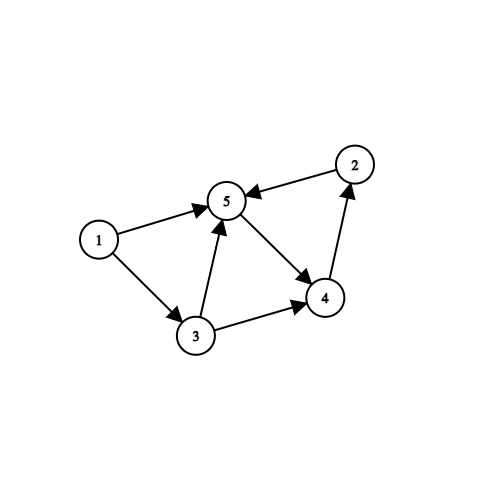

A is row-wise schocastic, symmetric and the underlying graph is connected.

Then the concensus will reach the avg value of initial vales for all nodes.

In [2]:
n = 5
A = np.full((n, n), 1.0 / (n - 1))
np.fill_diagonal(A, 0)

x0 = np.array([14,5,6,5,10])
print (np.average(x0))
for i in range(50):
  A_1 = np.linalg.matrix_power(A,i)
  print(i, "->", np.dot(x0, A_1))

8.0
0 -> [14.  5.  6.  5. 10.]
1 -> [6.5  8.75 8.5  8.75 7.5 ]
2 -> [8.375  7.8125 7.875  7.8125 8.125 ]
3 -> [7.90625  8.046875 8.03125  8.046875 7.96875 ]
4 -> [8.0234375  7.98828125 7.9921875  7.98828125 8.0078125 ]
5 -> [7.99414062 8.00292969 8.00195312 8.00292969 7.99804688]
6 -> [8.00146484 7.99926758 7.99951172 7.99926758 8.00048828]
7 -> [7.99963379 8.00018311 8.00012207 8.00018311 7.99987793]
8 -> [8.00009155 7.99995422 7.99996948 7.99995422 8.00003052]
9 -> [7.99997711 8.00001144 8.00000763 8.00001144 7.99999237]
10 -> [8.00000572 7.99999714 7.99999809 7.99999714 8.00000191]
11 -> [7.99999857 8.00000072 8.00000048 8.00000072 7.99999952]
12 -> [8.00000036 7.99999982 7.99999988 7.99999982 8.00000012]
13 -> [7.99999991 8.00000004 8.00000003 8.00000004 7.99999997]
14 -> [8.00000002 7.99999999 7.99999999 7.99999999 8.00000001]
15 -> [7.99999999 8.         8.         8.         8.        ]
16 -> [8. 8. 8. 8. 8.]
17 -> [8. 8. 8. 8. 8.]
18 -> [8. 8. 8. 8. 8.]
19 -> [8. 8. 8. 8. 8.]
2

Estimating Water Level Using a Network of Buoys
A group of buoys is floating on the surface of a lake. Each buoy measures the local water level at its position. However, due to waves, wind, or sensor noise, some measurements are higher or lower than others — and a few may be completely wrong (outliers).

The buoys are connected in a network and can only communicate with nearby buoys.

The goal is for all the buoys to agree on a common water level estimate that reflects the overall state of the lake, without being thrown off by waves or faulty measurements.

To do this, each buoy:

Looks at its neighbors’ water level readings,

Compares them to its own,

Adjusts its estimate slightly in the direction of disagreement (up or down),

Repeats this over time.

Instead of averaging, they use only the sign of the difference to be more robust.

Eventually, all buoys converge to a shared value that resists the effect of local disturbances — a kind of network median of the water level.

In [3]:
!pip install igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 12.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import igraph as ig
import matplotlib.pyplot as plt

N = 50
x_init = np.random.uniform(500, 600, size=N-1)
x_init = np.append(x_init, 400)
orig = x_init.copy()

g = ig.Graph.Full(n=N)
epsilon = 0.1

# History to visualize evolution
history = [x_init.copy()]
are_within_tolerance = False
iter = 0

neighbors_list = [g.neighbors(i) for i in range(g.vcount())]

while(are_within_tolerance == False):
    iter += 1
    x_prev = x_init.copy()  # snapshot for synchronous update
    x_new = x_prev.copy()

    for v in g.vs:
        i = v.index
        sign_sum = np.sum([np.sign(x_prev[i] - x_prev[j]) for j in neighbors_list[i]])
        x_new[i] = x_prev[i] - (epsilon / len(neighbors_list[i])) * sign_sum

    x_init = x_new

    history.append(x_init.copy())

    if iter % 100 == 0:
      # check if all elements in the array are 1e-3 tol to each otherr
      reference_value = history[-1][0]
      are_within_tolerance = np.allclose(history[-1], reference_value, atol=1e-1)

      if are_within_tolerance:
        print(f"Converged after {iter + 1} iterations.")
        break

# Plot each value of x in history
history = np.array(history)
# find N colors
colors =  plt.cm.rainbow(np.linspace(0, 1, N))

for i in range(N):
    plt.plot(history[:, i], color=colors[i])

plt.xlabel('Iteration')
plt.ylabel('Node Value')
plt.title('Sign-Based Consensus Algorithm (Fully Connected Graph)')
plt.legend(title=f'Nodes (T = {len(history)} iterations)')
plt.grid(True)

plt.show()

A = g.get_adjacency()
print (orig)
A = np.full((N, N), 1.0 / (N - 1))
print('median = ', np.median(orig), 'avg = ', np.average(orig))
np.fill_diagonal(A, 0)
A = np.linalg.matrix_power(A,10)
np.dot(A, orig)
print(history[-1])
print()


Converged after 11 iterations.


/tmp/ipython-input-110-202604768.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Nodes (T = {len(history)} iterations)')


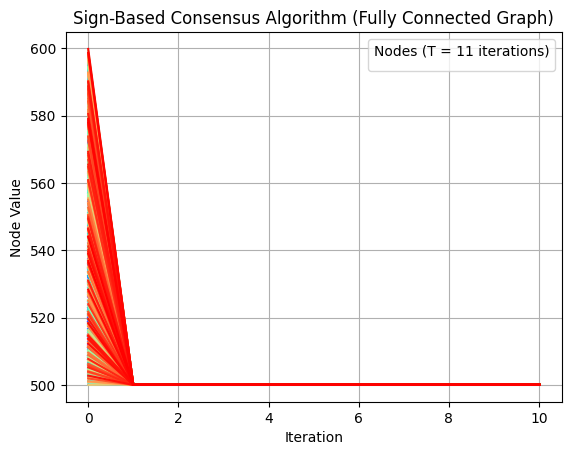

In [110]:
import numpy as np
import igraph as ig
import matplotlib.pyplot as plt

N = 500
x_init = np.random.uniform(500, 600, size=N)
orig = x_init.copy()

g = ig.Graph.Full(n=N)
epsilon = 0.1

# History to visualize evolution
history = [x_init.copy()]
are_within_tolerance = False
iter = 0

neighbors_list = [g.neighbors(i) for i in range(g.vcount())]

while(are_within_tolerance == False):
    iter += 1
    x_prev = x_init.copy()  # snapshot for synchronous update
    x_new = x_prev.copy()

    for v in g.vs:
        i = v.index
        x_new[i] = np.min([x_prev[j] for j in neighbors_list[i]])

    x_init = x_new

    history.append(x_init.copy())

    if iter % 10 == 0:
      # check if all elements in the array are 1e-3 tol to each otherr
      reference_value = history[-1][0]
      are_within_tolerance = np.allclose(history[-1], reference_value, atol=1e-1)

      if are_within_tolerance:
        print(f"Converged after {iter + 1} iterations.")
        break

# Plot each value of x in history
history = np.array(history)
# find N colors
colors =  plt.cm.rainbow(np.linspace(0, 1, N))

for i in range(N):
    plt.plot(history[:, i], color=colors[i])

plt.xlabel('Iteration')
plt.ylabel('Node Value')
plt.title('Sign-Based Consensus Algorithm (Fully Connected Graph)')
plt.legend(title=f'Nodes (T = {len(history)} iterations)')
plt.grid(True)

plt.show()

Converged after 11 iterations.


/tmp/ipython-input-112-2385693199.py:53: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Nodes (T = {len(history)} iterations)')


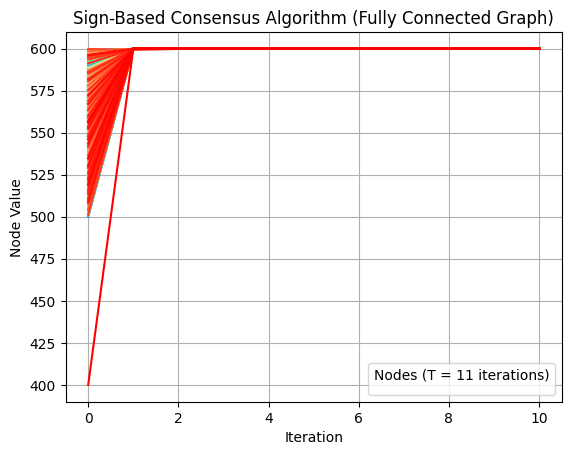

In [112]:
import numpy as np
import igraph as ig
import matplotlib.pyplot as plt

N = 500
x_init = np.random.uniform(500, 600, size=N-1)
x_init = np.append(x_init, 400)
orig = x_init.copy()

g = ig.Graph.Full(n=N)
epsilon = 0.1

# History to visualize evolution
history = [x_init.copy()]
are_within_tolerance = False
iter = 0

neighbors_list = [g.neighbors(i) for i in range(g.vcount())]

while(are_within_tolerance == False):
    iter += 1
    x_prev = x_init.copy()  # snapshot for synchronous update
    x_new = x_prev.copy()

    for v in g.vs:
        i = v.index
        x_new[i] = np.max([x_prev[j] for j in neighbors_list[i]])

    x_init = x_new

    history.append(x_init.copy())

    if iter % 10 == 0:
      # check if all elements in the array are 1e-3 tol to each otherr
      reference_value = history[-1][0]
      are_within_tolerance = np.allclose(history[-1], reference_value, atol=1e-1)

      if are_within_tolerance:
        print(f"Converged after {iter + 1} iterations.")
        break

# Plot each value of x in history
history = np.array(history)
# find N colors
colors =  plt.cm.rainbow(np.linspace(0, 1, N))

for i in range(N):
    plt.plot(history[:, i], color=colors[i])

plt.xlabel('Iteration')
plt.ylabel('Node Value')
plt.title('Sign-Based Consensus Algorithm (Fully Connected Graph)')
plt.legend(title=f'Nodes (T = {len(history)} iterations)')
plt.grid(True)

plt.show()